In [1]:
import pandas
from matplotlib import pyplot

In [2]:
folder = '/mnt/d/Users/Leon Bein/Documents/HPI/V_Simulation/repository/AgentBased_Epidemic_Simulation/results/data/'

In [5]:
data = pandas.read_csv(folder+'Compartmental_Data.2020.Aug.19.12_46_26.csv')  
display(data)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/Users/Leon Bein/Documents/HPI/V_Simulation/repository/AgentBased_Epidemic_Simulation/results/data/Compartmental_Data.2020.Aug.19.12_46_26.csv'

In [ ]:
groups = list(filter(lambda column: column != 'run' and column != 'tick', data))
print(groups)

In [ ]:
pyplot.figure(figsize=(20, 8))
pyplot.xlabel('tick')
pyplot.ylabel('#persons')
for group in groups:
    pyplot.plot(data['tick'], data[group], 'o', alpha=0.5)
# pyplot.savefig('figures/'+metric+'.png')

In [ ]:
pyplot.figure(figsize=(12, 12))
pyplot.xlabel('simulation time in days')
pyplot.ylabel('# persons')
groupedData = data.groupby('tick', as_index=False)
means = groupedData.mean()
upper = groupedData.quantile(0.75)
lower = groupedData.quantile(0.25)
maxs = groupedData.max()
mins = groupedData.min()

for group in groups:
    pyplot.plot(means['tick']/24, means[group], color=colors[group])
    pyplot.fill_between(means['tick']/24, maxs[group], mins[group], alpha=0.1, color=colors[group])
    pyplot.fill_between(means['tick']/24, lower[group], upper[group], alpha=0.35, color=colors[group])
pyplot.legend(groups)

In [3]:
colors = {'Susceptible' : '#00AA00', 'Exposed': '#AAAA00', 'Infectious' : '#AA0000', 'Symptomatic' : '#1100AA', 'Removed' : '#666666'}
groups = ['Susceptible', 'Exposed', 'Infectious', 'Symptomatic', 'Removed']

NameError: name 'means' is not defined

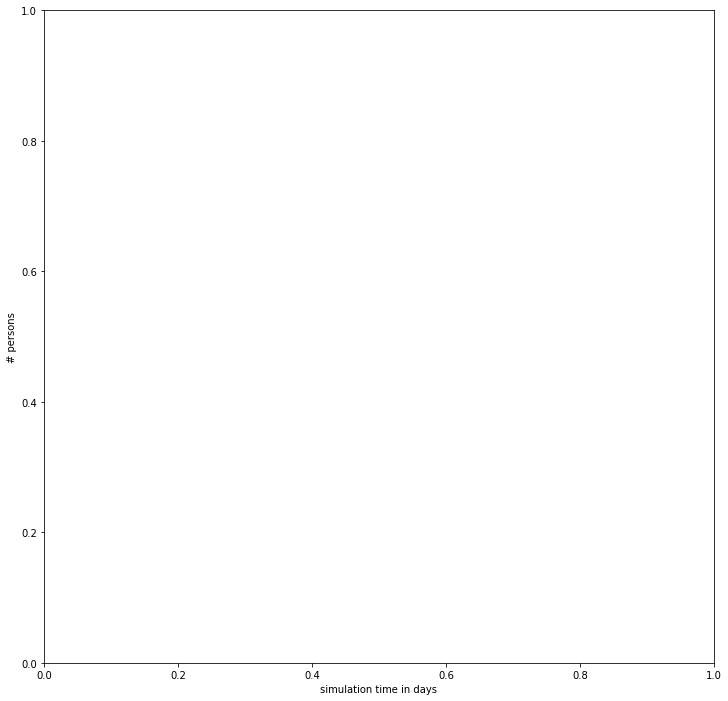

In [6]:
pyplot.figure(figsize=(12, 12))
pyplot.xlabel('simulation time in days')
pyplot.ylabel('# persons')
summed = 0
for group in ['Susceptible', 'Exposed', 'Infectious', 'Removed']:
    if group != 'Symptomatic':
        pyplot.fill_between(means['tick']/24, summed, summed + means[group], color=colors[group])
        summed = summed + means[group]
pyplot.legend(['Susceptible', 'Exposed', 'Infectious', 'Removed'])

# Comparing to SEIR

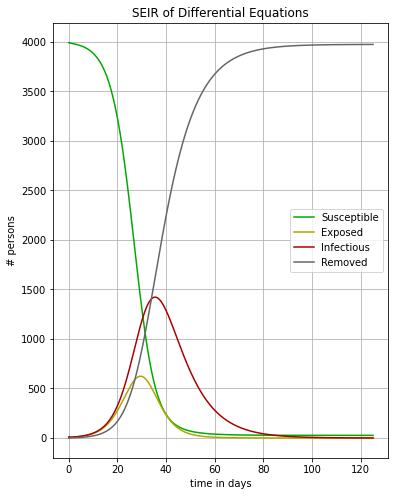

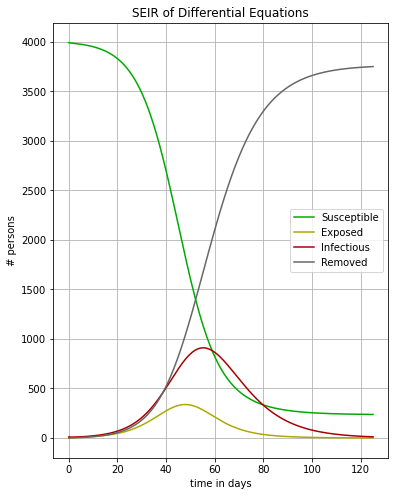

In [16]:
from numpy import array as vector

def makeSEIR(R0 = 5):
    N = 4000 # Einwohnerzahl von Deutschland 2019/2020
    gamma = 1/10.0 # 1 / infectiousness
    alpha = 1/3.1 # 1 / latency period
    I0 = 10/N
    beta = R0*gamma

    # Explizites Euler-Verfahren
    def euler_method(f,t0,x0,t1,h):
        t = t0; x = x0
        a = [[t,x * N]]
        for k in range(0,1+int((t1-t0)/h)):
            t = t0 + k*h
            x = x + h*f(t,x)
            a.append([t,x * N])
        return a

    def SEIR_model(beta,gamma,a):
        def f(t,x):
            S,E,I,R = x
            return vector([
                -beta*S*I,
                beta*S*I - a*E,
                a*E - gamma*I,
                gamma*I
            ])
        return f

    def SEIR_simulation(beta,gamma,a,E0,I0,days,step=0.1):
        x0 = vector([1.0-E0-I0,E0,I0,0.0])
        return euler_method(SEIR_model(beta,gamma,a),0,x0,days,step)

    def diagram(simulation):
        pyplot.figure(figsize=(6, 8))
        pyplot.title('SEIR of Differential Equations')
        pyplot.xlabel('time in days')
        pyplot.ylabel('# persons')
        pyplot.grid()
        t,x = zip(*simulation)
        S,E,I,R = zip(*x)
        pyplot.plot(t,S, color = colors['Susceptible'])
        pyplot.plot(t,E, color = colors['Exposed'])
        pyplot.plot(t,I, color = colors['Infectious'])
        pyplot.plot(t,R, color = colors['Removed'])
        pyplot.legend(['Susceptible', 'Exposed', 'Infectious', 'Removed'])
        pyplot.savefig('figures/seir'+str(R0)+'.svg', bbox_inches='tight')


    SEIR_data = SEIR_simulation( beta = beta, gamma = gamma, a = alpha, E0 = 0, I0 = I0, days = 125)

    diagram(SEIR_data)
makeSEIR(5)
makeSEIR(3)

# Functions

In [20]:
def plot_data(data, title='Untitled'):
    pyplot.figure(figsize=(6, 8))
    pyplot.title(title)
    pyplot.grid()
    pyplot.xlabel('simulation time in days')
    pyplot.ylabel('# persons')
    groupedData = data.groupby('tick', as_index=False)
    means = groupedData.mean()
    upper = groupedData.quantile(0.75)
    lower = groupedData.quantile(0.25)
    maxs = groupedData.max()
    mins = groupedData.min()

    colors = {'Exposed': '#AAAA00', 'Susceptible' : '#00AA00', 'Infectious' : '#AA0000', 'Symptomatic' : '#1100AA', 'Removed' : '#666666'}

    groups = ['Susceptible', 'Exposed', 'Infectious', 'Symptomatic', 'Removed']
    for group in groups:
        pyplot.plot(means['tick']/24, means[group], color=colors[group])
        pyplot.fill_between(means['tick']/24, maxs[group], mins[group], alpha=0.1, color=colors[group])
        pyplot.fill_between(means['tick']/24, lower[group], upper[group], alpha=0.35, color=colors[group])
    pyplot.legend(groups, loc='center right')
    pyplot.savefig('figures/'+(title.replace("'", '').replace(' ', '_').replace(':', '').replace(',', '').replace('/', ''))+'.svg', bbox_inches='tight')

In [17]:
def plot_r(data, title='Untitled'):
    pyplot.figure(figsize=(12, 12))
    pyplot.title(title)
    pyplot.grid()
    pyplot.xlabel('simulation time in days')
    pyplot.ylabel('R')
    groupedData = data.groupby('tick', as_index=False)
    means = groupedData.mean()
    upper = groupedData.quantile(0.75)
    lower = groupedData.quantile(0.25)
    maxs = groupedData.max()
    mins = groupedData.min()

    colors = {'R': '#AAAA00'}

    groups = ['R']
    for group in groups:
        pyplot.plot(means['tick']/24, means[group], color=colors[group])
        pyplot.fill_between(means['tick']/24, maxs[group], mins[group], alpha=0.1, color=colors[group])
        pyplot.fill_between(means['tick']/24, lower[group], upper[group], alpha=0.35, color=colors[group])
    pyplot.legend(groups, loc='center right')

# Real used data

In [18]:
runId = 'Compartmental_Data.2020.Aug.20.16_36_20'

data = pandas.read_csv(folder+runId+'.csv')  
groups = list(filter(lambda column: column != 'run' and column != 'tick', data))

params = pandas.read_csv(folder+runId+'.batch_param_map.csv')
paramIds = list(filter(lambda column: column != 'run' and column != 'randomSeed', params))

merged = data.merge(params, on=['run'])

display(merged)

,run,Exposed,Susceptible,Infectious,Symptomatic,Removed,tick,allowHealthInsurance,randomSeed,allowHomeOffice
0,1,0.0,3990.0,10.0,0.0,0.0,1.0,True,194417956,True
1,1,0.0,3990.0,10.0,0.0,0.0,2.0,True,194417956,True
2,1,1.0,3989.0,10.0,0.0,0.0,3.0,True,194417956,True
3,1,1.0,3989.0,10.0,0.0,0.0,4.0,True,194417956,True
4,1,1.0,3989.0,10.0,0.0,0.0,5.0,True,194417956,True
...,...,...,...,...,...,...,...,...,...,...
1199995,400,0.0,51.0,0.0,0.0,3949.0,2996.0,False,206180656,False
1199996,400,0.0,51.0,0.0,0.0,3949.0,2997.0,False,206180656,False
1199997,400,0.0,51.0,0.0,0.0,3949.0,2998.0,False,206180656,False
1199998,400,0.0,51.0,0.0,0.0,3949.0,2999.0,False,206180656,False


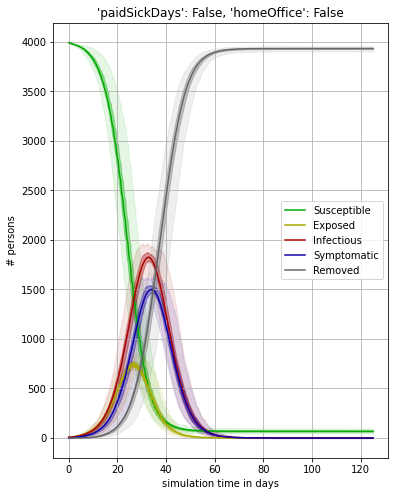

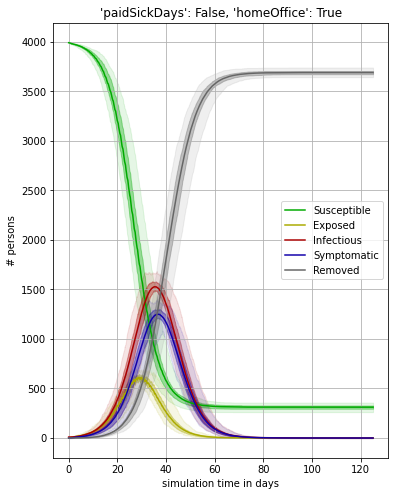

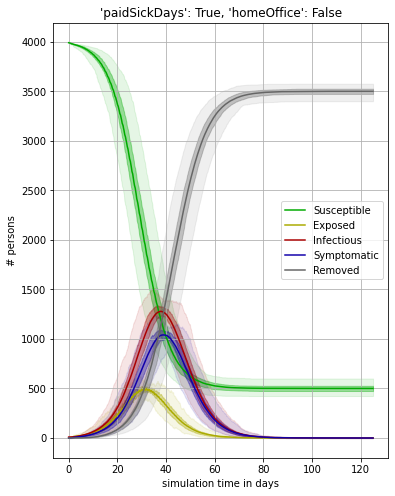

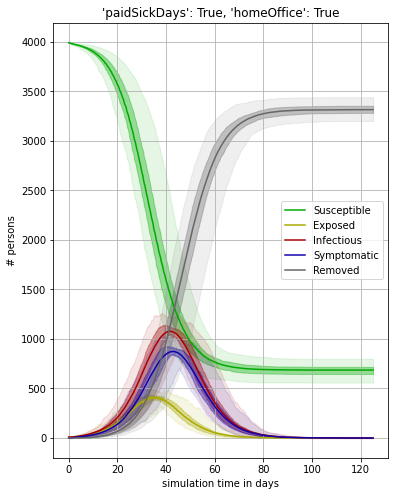

In [21]:
for group, data in merged.groupby(paramIds):
    plot_data(data, str(dict(zip(['paidSickDays', 'homeOffice'], group)))[1:-1])

,run,R,tick,allowHealthInsurance,randomSeed,allowHomeOffice
0,1,3.36,1.0,True,194417956,True
1,1,2.88,2.0,True,194417956,True
2,1,2.88,3.0,True,194417956,True
3,1,3.12,4.0,True,194417956,True
4,1,3.12,5.0,True,194417956,True
...,...,...,...,...,...,...
1199995,400,NaN,2996.0,False,206180656,False
1199996,400,NaN,2997.0,False,206180656,False
1199997,400,NaN,2998.0,False,206180656,False
1199998,400,NaN,2999.0,False,206180656,False


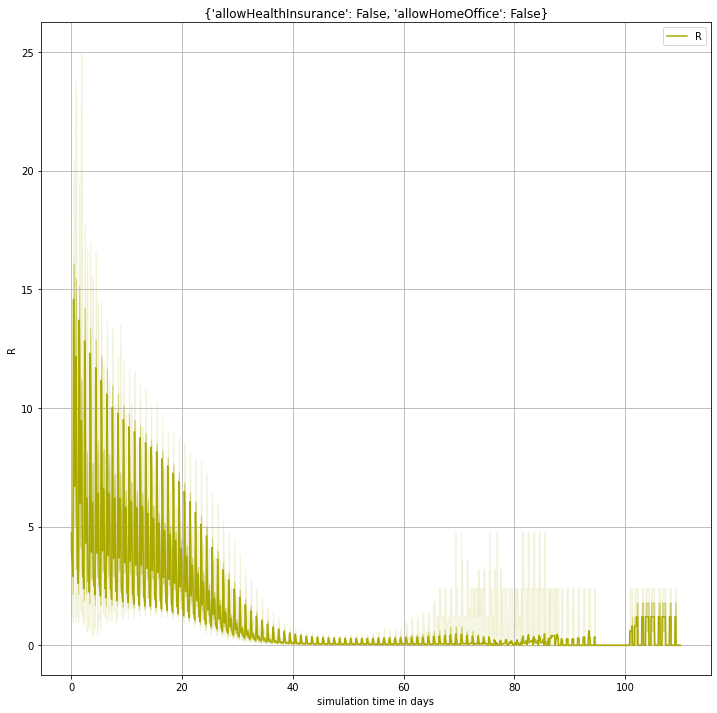

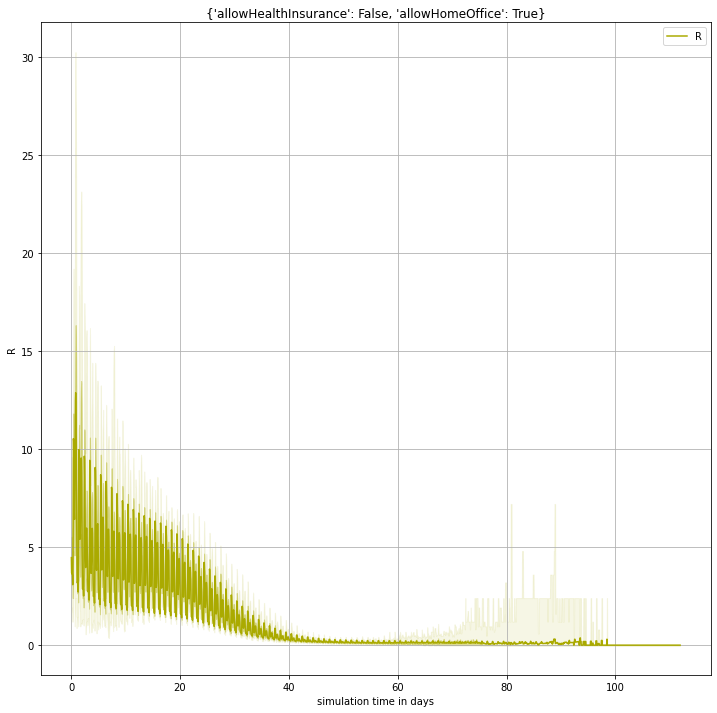

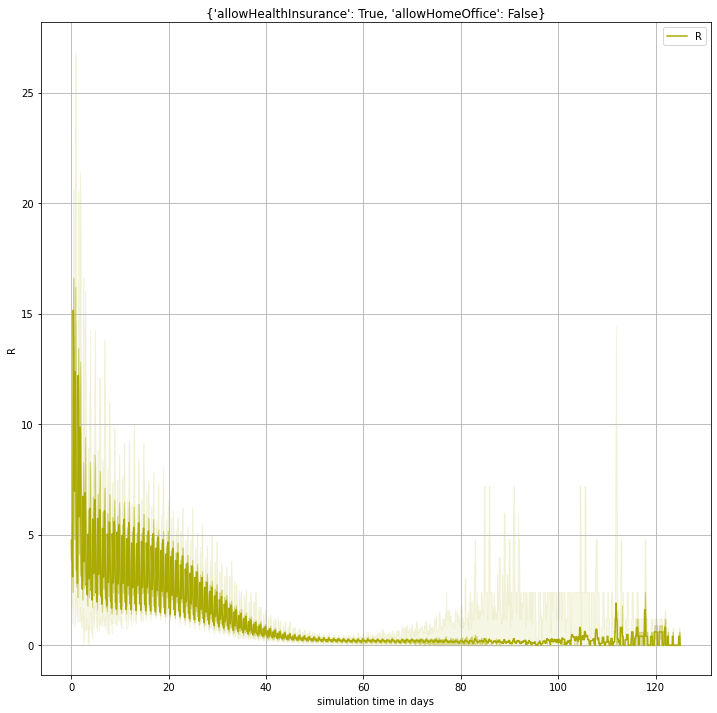

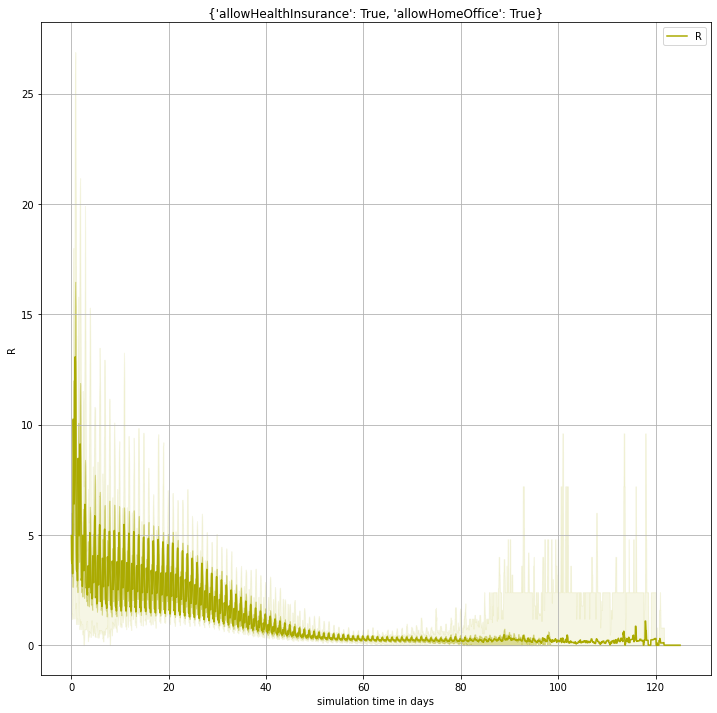

In [11]:
rvalueId = 'R_Value.2020.Aug.20.16_36_20'

rdata = pandas.read_csv(folder+rvalueId+'.csv')  
rgroups = list(filter(lambda column: column != 'run', rdata))

rparams = pandas.read_csv(folder+rvalueId+'.batch_param_map.csv')
rparamIds = list(filter(lambda column: column != 'run' and column != 'randomSeed', rparams))

rmerged = rdata.merge(rparams, on=['run'])

display(rmerged)

for group, data in rmerged.groupby(rparamIds):
    plot_r(data, str(dict(zip(rparamIds, group))))

# Data of 2/3 homeoffice

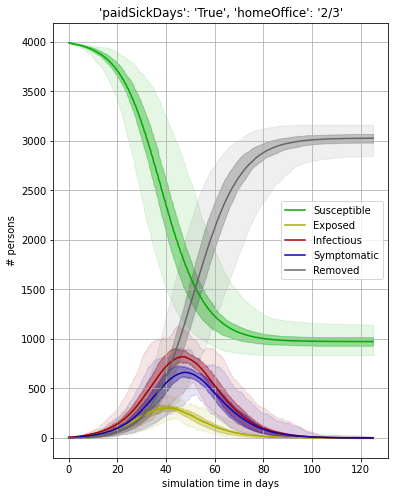

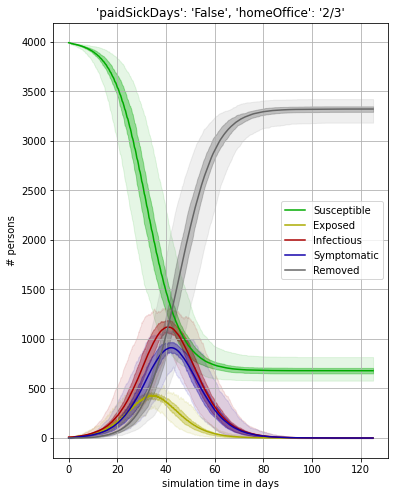

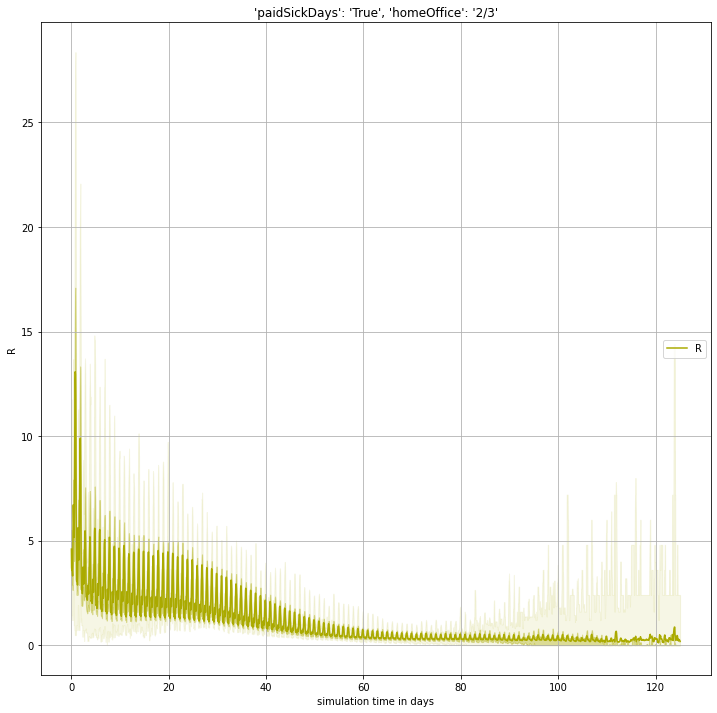

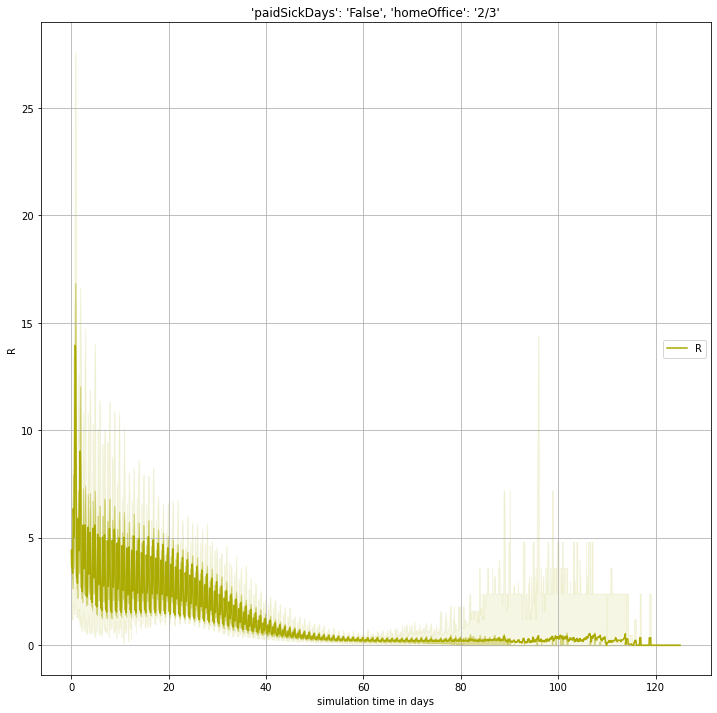

In [22]:
dataTwoThirdWith = pandas.read_csv(folder+'Compartmental_Data.2020.Aug.20.19_05_11.csv')  
dataTwoThirdWithOut = pandas.read_csv(folder+'Compartmental_Data.2020.Aug.20.21_28_23.csv')  
plot_data(dataTwoThirdWith, str(dict(zip(['paidSickDays', 'homeOffice'], ['True', '2/3'])))[1:-1])
plot_data(dataTwoThirdWithOut, str(dict(zip(['paidSickDays', 'homeOffice'], ['False', '2/3'])))[1:-1])

rdataTwoThirdWith = pandas.read_csv(folder+'R_Value.2020.Aug.20.19_05_11.csv')  
rdataTwoThirdWithOut = pandas.read_csv(folder+'R_Value.2020.Aug.20.21_28_23.csv')  
plot_r(rdataTwoThirdWith, str(dict(zip(['paidSickDays', 'homeOffice'], ['True', '2/3'])))[1:-1])
plot_r(rdataTwoThirdWithOut, str(dict(zip(['paidSickDays', 'homeOffice'], ['False', '2/3'])))[1:-1])

# Data of old configuration

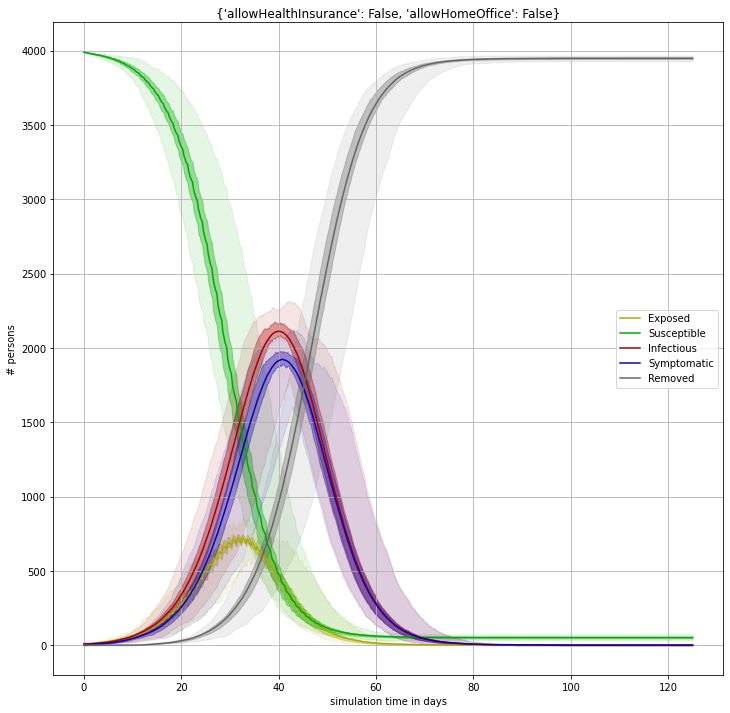

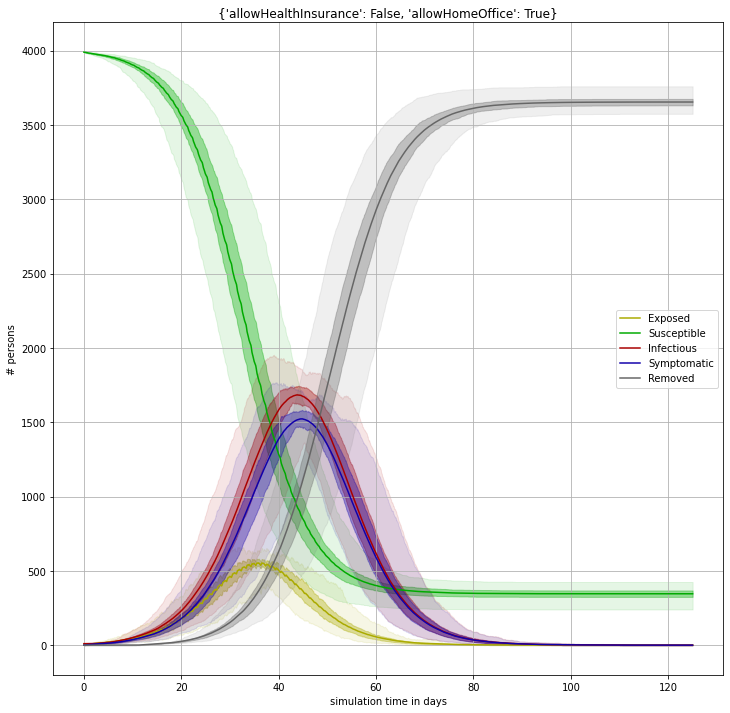

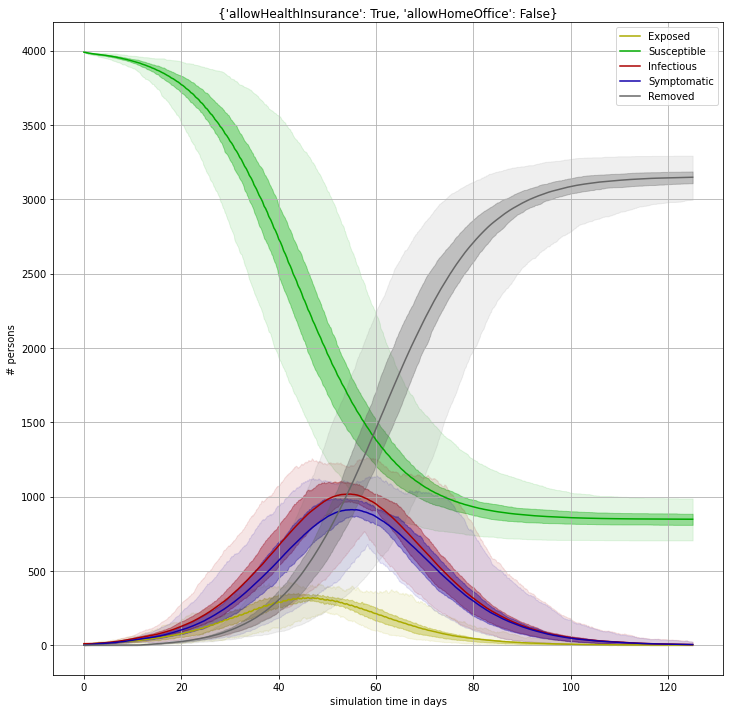

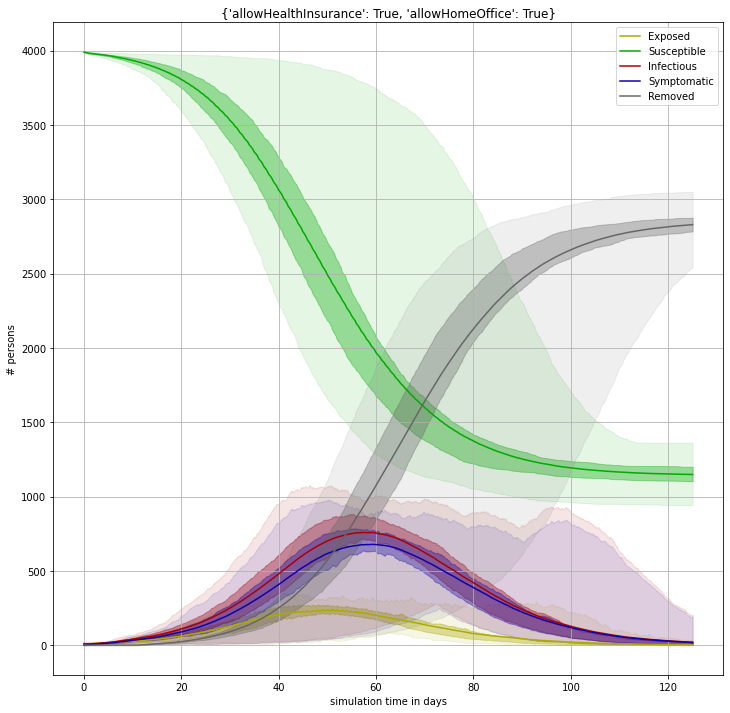

In [125]:
for group, data in merged.groupby(paramIds):
    plot_data(data, str(dict(zip(paramIds, group))))

# XXX

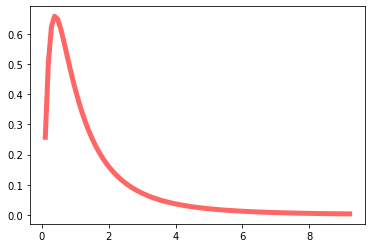

In [7]:
import numpy
from matplotlib import pyplot
from scipy.stats import lognorm

s = 0.954

mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
x = numpy.linspace(lognorm.ppf(0.01, s), lognorm.ppf(0.99, s), 100)

pyplot.plot(x, lognorm.pdf(x, s), 'r-', lw=5, alpha=0.6, label='lognorm pdf')